In [1]:
import os
import pandas   as pd
import numpy    as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("E:/DATA SCIENCE/Capstone Project/Win Prediction")

In [3]:
fullraw = pd.read_csv("Win_Prediction_Data.csv")

In [4]:
fullraw

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,18-Mar-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,4-Mar-19,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,28-Feb-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,27-Jan-19,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [5]:
fullraw.describe(include = 'object')

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Status Code
count,9982,10061,10061,10061,10061,10061,10061,10061
unique,41,67,2555,25,13,43,278,2
top,Others,Solution 32,27-Jul-18,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1763,1439,15,2693,3360,1166,323,6306


## EDA

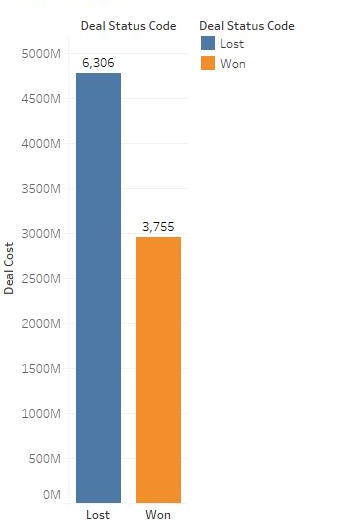

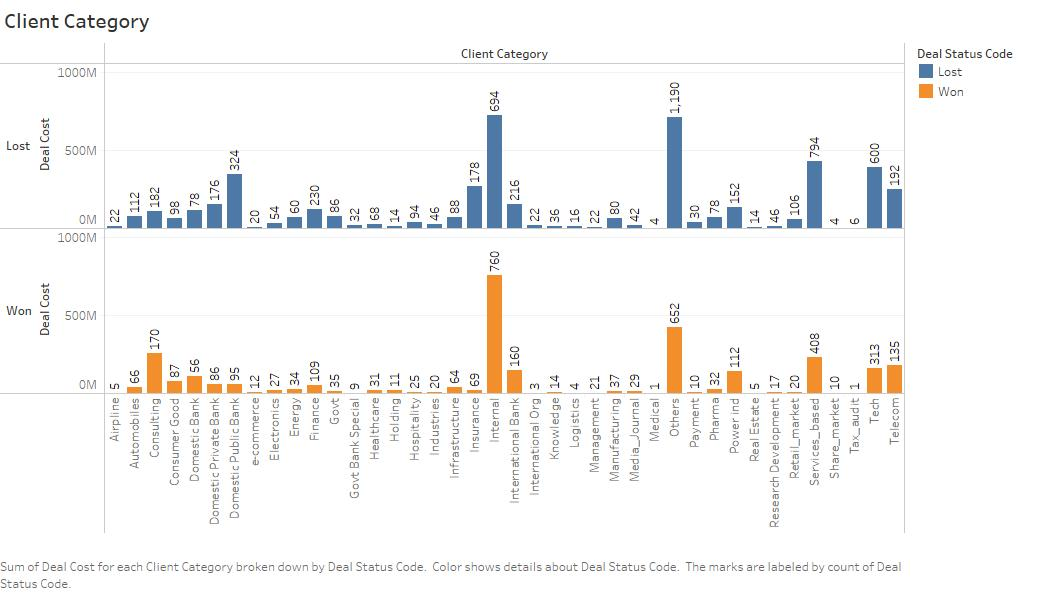

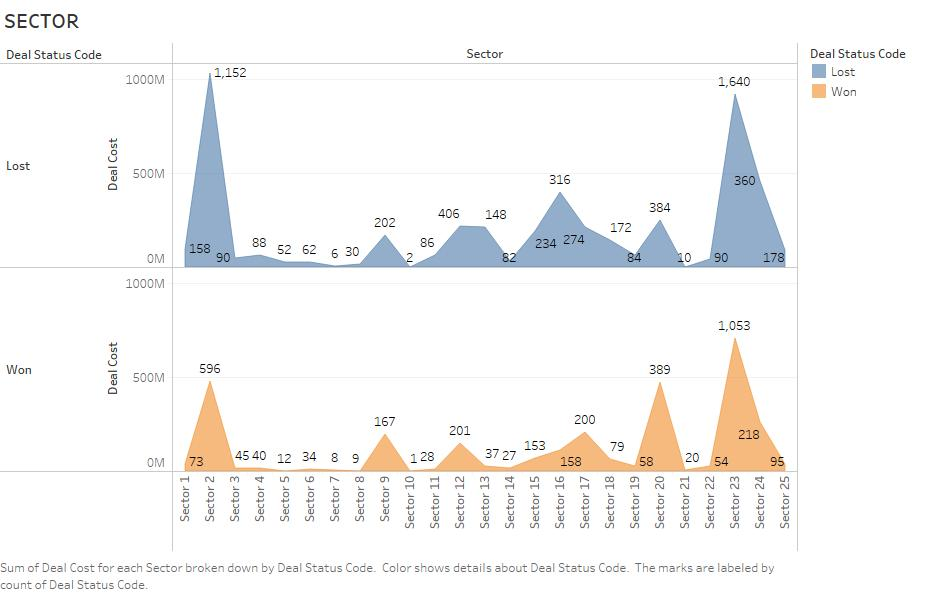

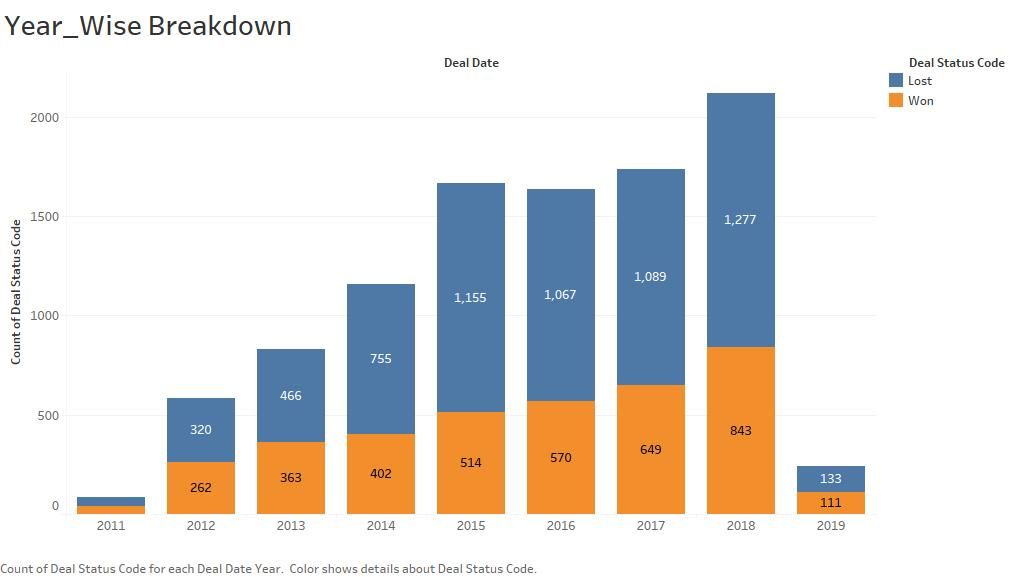

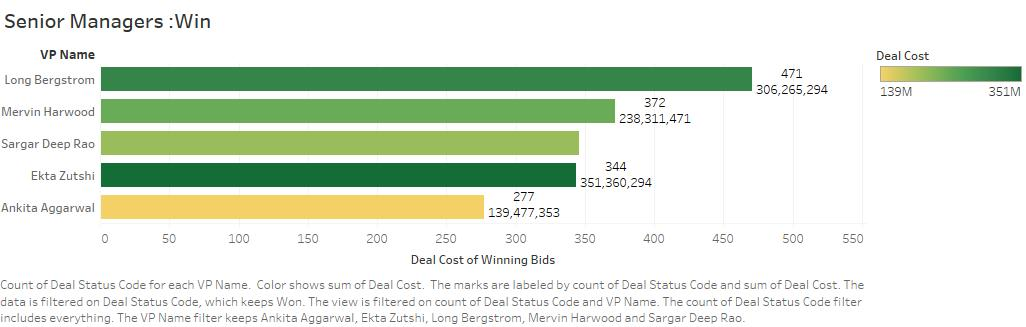

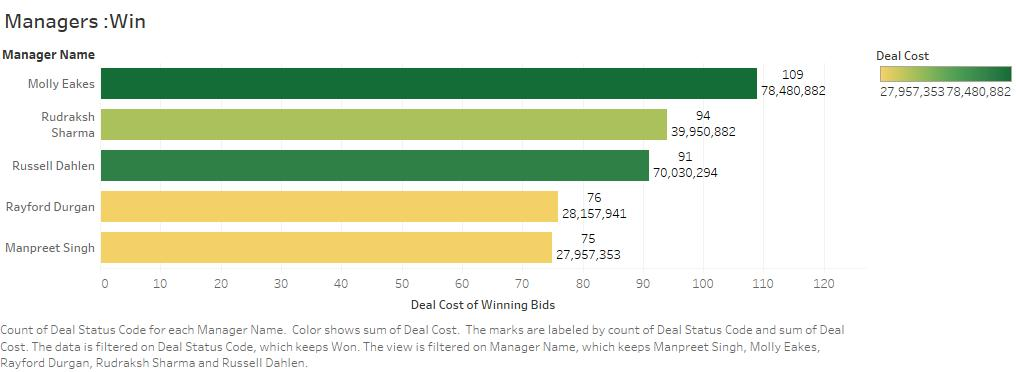

#### Missing Value Treatment

In [6]:
fullraw.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

#### Replacing Missing Values with Mode_Value in Client Category

In [7]:
fullraw['Client Category'] = fullraw['Client Category'].fillna(fullraw['Client Category'].mode()[0])

In [8]:
fullraw.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

#### Deal_Cost Column

In [9]:
get_ipython().run_line_magic('matplotlib','inline')

<AxesSubplot:xlabel='Deal Cost', ylabel='Count'>

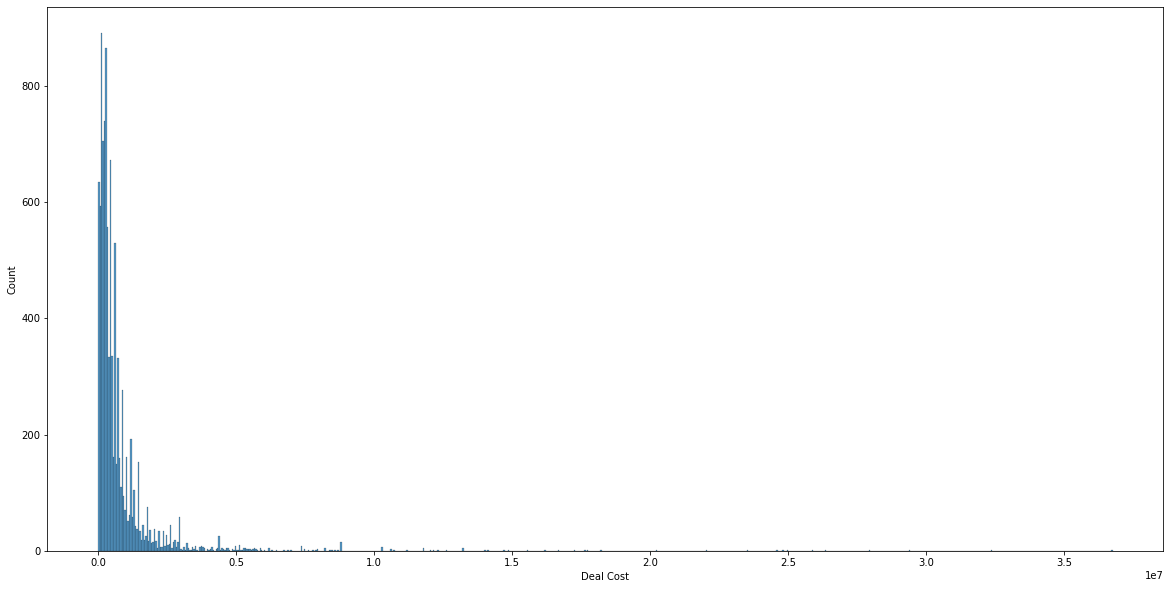

In [10]:
plt.figure(figsize = (20,10))
sns.histplot(fullraw['Deal Cost'])

###### The Deal_Cost column is Right_Skewed...

In [11]:
fullraw['Deal Cost'].value_counts()

294117.65     508
588235.29     390
441176.47     377
147058.82     363
0.00          246
             ... 
329117.65       1
101764.71       1
503529.41       1
666176.47       1
3042058.82      1
Name: Deal Cost, Length: 1469, dtype: int64

###### Handling "0" values of Deal_Cost with Median Value

In [12]:
tempmedian = fullraw['Deal Cost'].median()

In [13]:
tempmedian

382352.94

In [14]:
fullraw['Deal Cost'].replace(0.00, tempmedian, inplace = True)

In [15]:
fullraw['Deal Cost'].value_counts()

294117.65      508
588235.29      390
441176.47      377
147058.82      363
382352.94      309
              ... 
36764705.88      1
1046764.71       1
22058823.53      1
29411764.71      1
3042058.82       1
Name: Deal Cost, Length: 1468, dtype: int64

<AxesSubplot:xlabel='Deal Cost', ylabel='Count'>

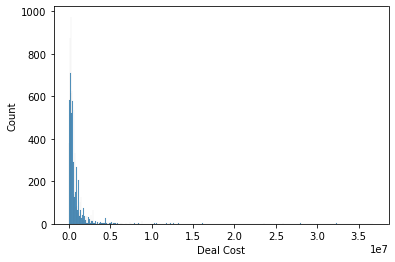

In [16]:
sns.histplot(fullraw['Deal Cost'])

#### Log value of Deal Cost  to normalise the Skewed Data

In [17]:
fullraw['Log Deal Cost'] = np.log(fullraw['Deal Cost'])

In [18]:
fullraw

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Log Deal Cost
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,11.918391
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,13.520745
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,11.002100
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,11.002100
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,11.300751
...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,18-Mar-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost,13.284882
10057,Internal,Solution 6,4-Mar-19,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won,13.563271
10058,Power ind,Solution 9,28-Feb-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost,13.284882
10059,Power ind,Solution 62,27-Jan-19,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won,14.928045


<AxesSubplot:xlabel='Log Deal Cost', ylabel='Count'>

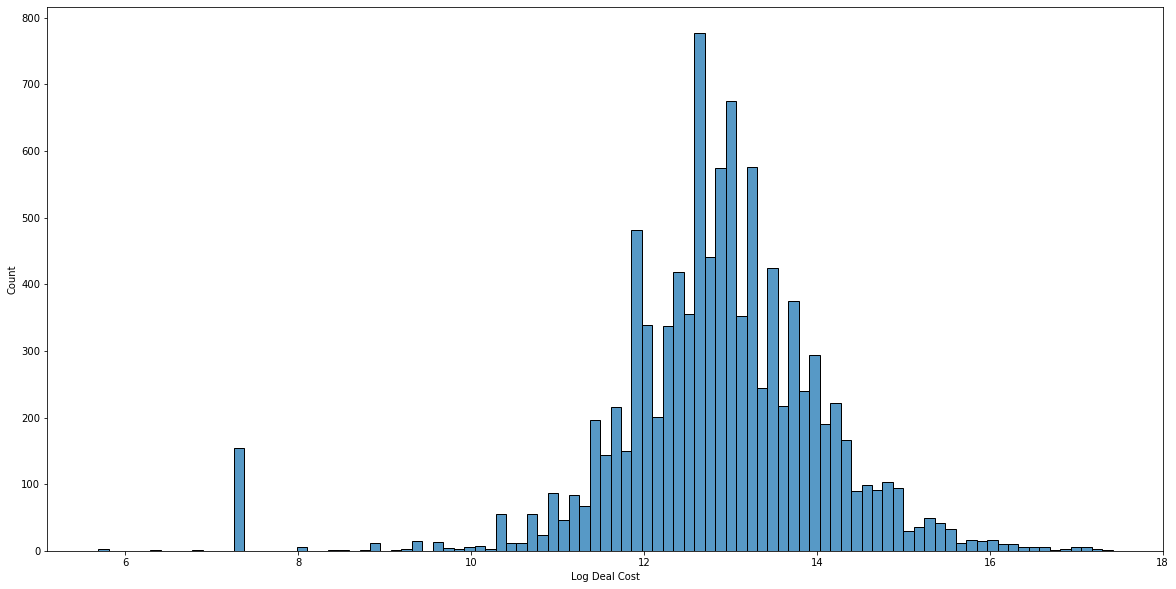

In [19]:
plt.figure (figsize = (20,10))
sns.histplot (fullraw["Log Deal Cost"])

#### Combine VP Name and Manager Name

In [20]:
fullraw['Vp_Manager'] = fullraw["VP Name"] + " " + fullraw["Manager Name"]

#### Dropping 'VP Name' & 'Manager Name' column from the data,

In [21]:
fullraw = fullraw.drop(["VP Name"], axis = 1)

fullraw = fullraw.drop(["Manager Name"], axis = 1)

#### Dropping 'Deal Cost' column from the data,

In [22]:
fullraw = fullraw.drop(["Deal Cost"], axis = 1)

#### Dropping 'Deal Date' column from the data, as it is not going to assist us in our model

In [23]:
fullraw = fullraw.drop(['Deal Date'], axis = 1)

#### Dropping 'Location' column from the data

In [24]:
fullraw = fullraw.drop(['Location'], axis = 1)

In [26]:
fullraw

,Client Category,Solution Type,Sector,Deal Status Code,Log Deal Cost,Vp_Manager
0,Telecom,Solution 7,Sector 24,Won,11.918391,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,Won,13.520745,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Lost,11.002100,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Lost,11.002100,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Lost,11.300751,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,Lost,13.284882,Rudraksh Sharma Rudraksh Sharma
10057,Internal,Solution 6,Sector 20,Won,13.563271,Rudraksh Sharma Sharavan Singh
10058,Power ind,Solution 9,Sector 9,Lost,13.284882,Rudraksh Sharma Rudraksh Sharma
10059,Power ind,Solution 62,Sector 9,Won,14.928045,Man Suddeth Cleotilde Biron


In [27]:
fullraw.dtypes

Client Category      object
Solution Type        object
Sector               object
Deal Status Code     object
Log Deal Cost       float64
Vp_Manager           object
dtype: object

### ML Model 

#### Recoding Dependant Variable

In [28]:
fullraw['Deal Status Code'] = np.where(fullraw["Deal Status Code"] == "Won", 1, 0)

In [29]:
fullraw['Deal Status Code'].value_counts()

0    6306
1    3755
Name: Deal Status Code, dtype: int64

#### Dummy Variable Creation

In [30]:
fullraw1 = pd.get_dummies(fullraw)

In [31]:
fullraw1.shape

(10061, 1095)

#### Sampling

In [32]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(fullraw1, train_size = 0.7, random_state = 7)

In [33]:
Train.shape

(7042, 1095)

In [34]:
Test.shape

(3019, 1095)

### Sampling into X & Y
##### Dividing each dataset into Independant Variables & Dependant Variables(depvar)

In [35]:
depvar = "Deal Status Code"

In [36]:
TrainX = Train.drop(depvar, axis = 1).copy()

TrainY = Train[depvar].copy()

In [37]:
TestX = Test.drop(depvar, axis= 1).copy()

TestY = Test[depvar].copy()

In [38]:
TrainX.shape

(7042, 1094)

In [39]:
TestX.shape

(3019, 1094)

### Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.pyplot import figure

In [41]:
M1 = DecisionTreeClassifier(random_state = 143).fit(TrainX, TrainY)

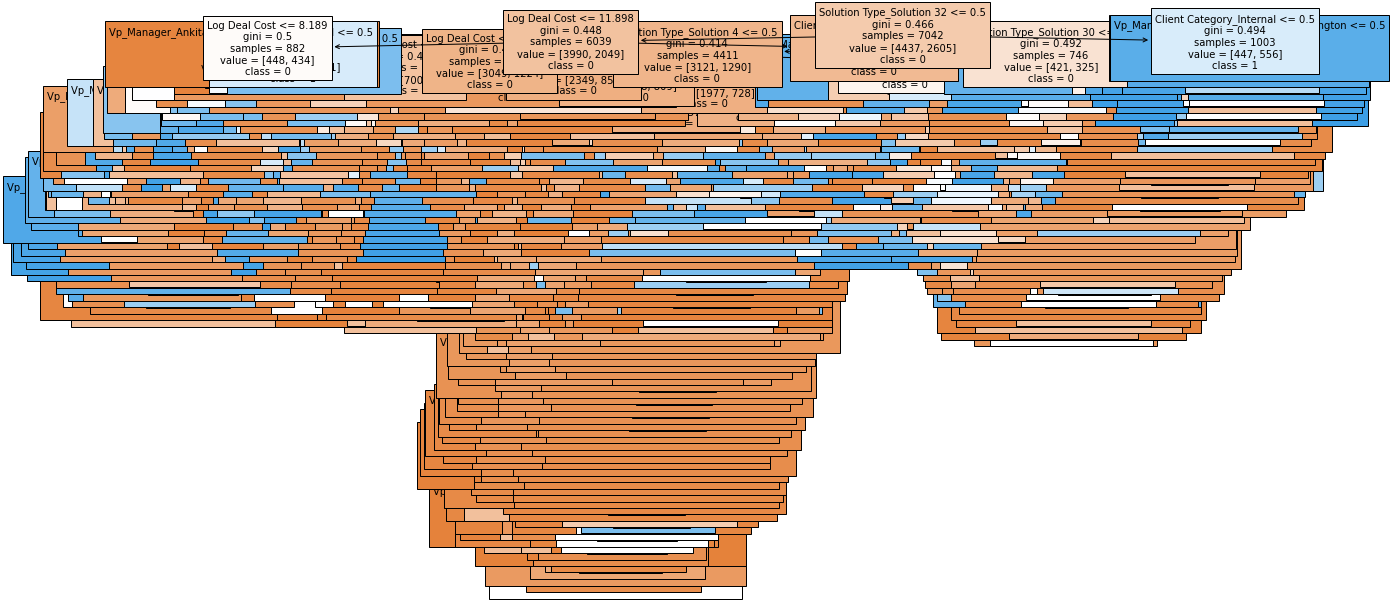

In [42]:
plt.figure(figsize = (20,10))
DT_plot = plot_tree(M1, fontsize = 10, feature_names = TrainX.columns, filled = True, class_names = ["0", "1"])

#### Prediction & Validation on Test set

In [43]:
Test_pred = M1.predict(TestX)

In [44]:
Confu_mat = pd.crosstab(TestY, Test_pred)

In [45]:
Confu_mat

col_0,0,1
Deal Status Code,,
0,1725,144
1,497,653


#### Visualize Confusion_Matrix

In [46]:
from sklearn.metrics  import confusion_matrix, ConfusionMatrixDisplay

In [47]:
Cm = confusion_matrix(TestY, Test_pred, labels = M1.classes_ )

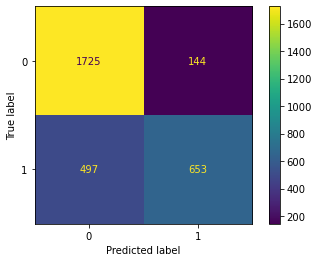

In [48]:
disp = ConfusionMatrixDisplay( confusion_matrix = Cm, display_labels = M1.classes_)
disp.plot()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(TestY, Test_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1869
           1       0.82      0.57      0.67      1150

    accuracy                           0.79      3019
   macro avg       0.80      0.75      0.76      3019
weighted avg       0.79      0.79      0.78      3019



#### DT Model-2

In [49]:
M2 = DecisionTreeClassifier(random_state = 666, min_samples_leaf = 390).fit(TrainX, TrainY)

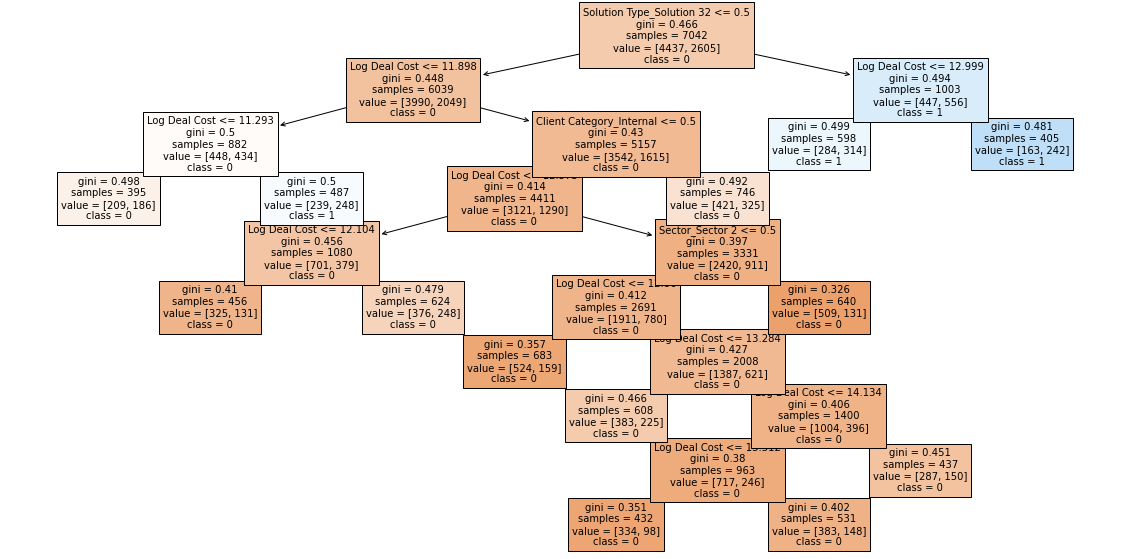

In [50]:
plt.figure(figsize = (20,10))
DT_plot1 = plot_tree(M2, fontsize = 10, feature_names = TrainX.columns, filled = True, class_names = ["0", "1"]) 

In [51]:
Test_Pred = M2.predict(TestX) 

In [52]:
Confu_Mat = pd.crosstab(TestY, Test_Pred)

In [53]:
Confu_Mat

col_0,0,1
Deal Status Code,,
0,1571,298
1,769,381


In [54]:
Cm1 = confusion_matrix(TestY, Test_Pred, labels = M2.classes_ )

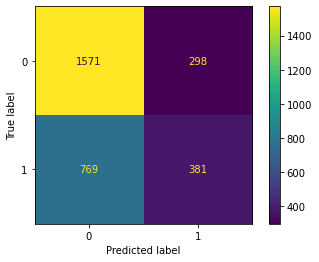

In [55]:
disp = ConfusionMatrixDisplay( confusion_matrix = Cm1, display_labels = M2.classes_)
disp.plot()

In [58]:
print(classification_report(TestY, Test_Pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75      1869
           1       0.56      0.33      0.42      1150

    accuracy                           0.65      3019
   macro avg       0.62      0.59      0.58      3019
weighted avg       0.63      0.65      0.62      3019



### Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
M_rf1 = RandomForestClassifier(random_state = 777).fit(TrainX, TrainY)

In [61]:
Test_Pred = M_rf1.predict(TestX)

In [62]:
Confu_mat = pd.crosstab(TestY, Test_Pred)

In [63]:
Confu_mat

col_0,0,1
Deal Status Code,,
0,1772,97
1,520,630


In [64]:
Cm1 = confusion_matrix(TestY, Test_Pred, labels = M_rf1.classes_ )

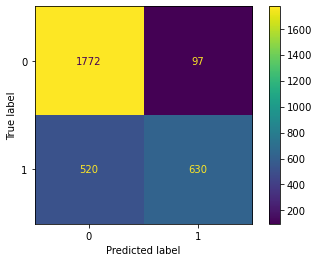

In [65]:
disp = ConfusionMatrixDisplay( confusion_matrix = Cm1, display_labels = M_rf1.classes_)
disp.plot()

In [66]:
print(classification_report(TestY, Test_Pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1869
           1       0.87      0.55      0.67      1150

    accuracy                           0.80      3019
   macro avg       0.82      0.75      0.76      3019
weighted avg       0.81      0.80      0.78      3019



#### Variable Importance

In [67]:
M_rf1.feature_importances_  

array([2.15316507e-01, 6.35452710e-04, 2.65020268e-03, ...,
       1.24480211e-04, 3.40649931e-04, 9.25718888e-05])

### Prediction on Testset

In [68]:
Var_imp_df = pd.concat([pd.DataFrame(M_rf1.feature_importances_), pd.DataFrame(TrainX.columns)], axis = 1)

In [69]:
Var_imp_df
Var_imp_df.columns = ["Value", "Variable_Name"]
Var_imp_df.sort_values("Value", ascending = False, inplace = True)
Var_imp_df

,Value,Variable_Name
0,0.215317,Log Deal Cost
67,0.017610,Solution Type_Solution 32
20,0.015060,Client Category_Internal
29,0.013563,Client Category_Others
124,0.009691,Sector_Sector 23
...,...,...
519,0.000000,Vp_Manager_Mangesh K. Singh Ayusha Gupta
229,0.000000,Vp_Manager_Brendon Wycoff Jose Gamber
336,0.000000,Vp_Manager_Gaurav Sameria Akshay Gosh
829,0.000000,Vp_Manager_Russell Dahlen Prakash Srinivas


### Visualization

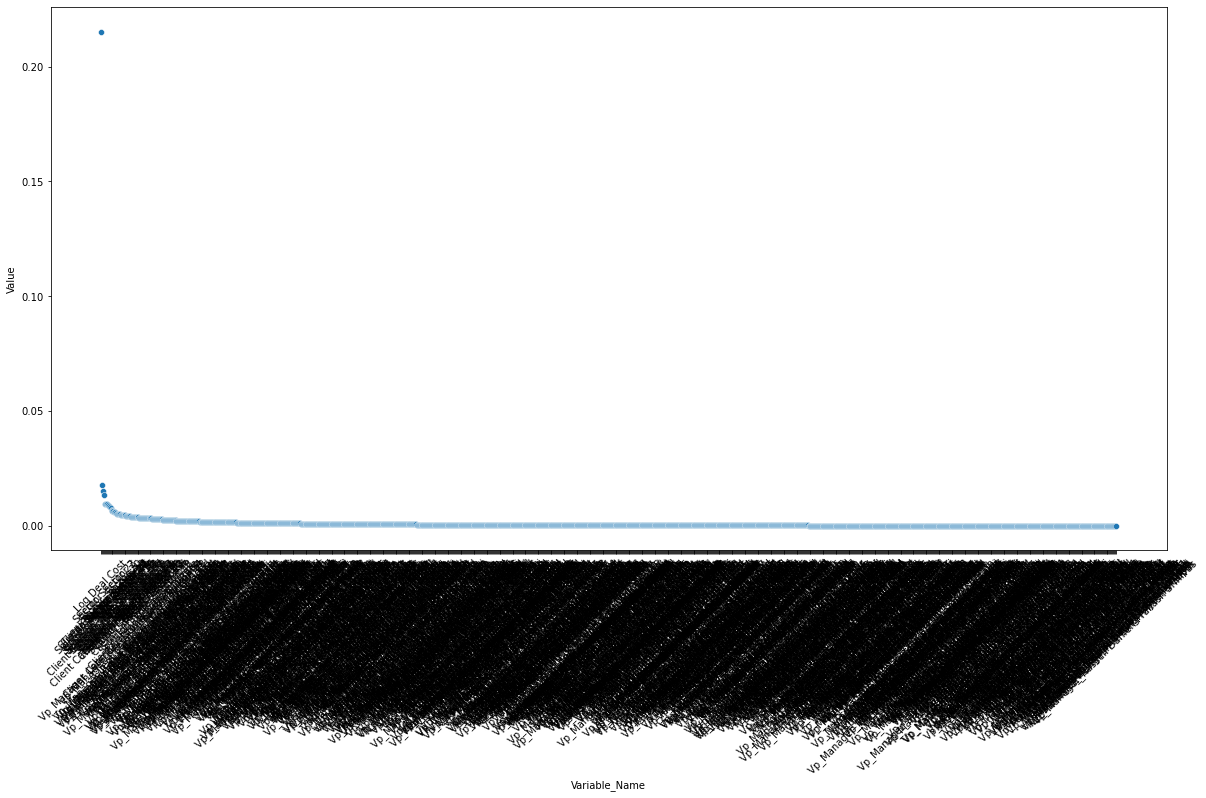

In [70]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
plot= sns.scatterplot(x = "Variable_Name", y = "Value", data = Var_imp_df)

#### RF_Model with Tuning Parameters

In [71]:
M_rf2 = RandomForestClassifier( random_state = 143, n_estimators = 25,
                                max_features = 5, min_samples_leaf = 500)

In [72]:
M_rf2 = M_rf2.fit(TrainX, TrainY)

In [73]:
Test_Pred2 = M_rf2.predict(TestX)

In [74]:
Confu_mat2 = pd.crosstab(TestY, Test_Pred2)

In [75]:
Confu_mat2

col_0,0
Deal Status Code,
0,1869
1,1150


#### RandomForest Grid Searching

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
my_para_grid = {"n_estimators"     : [25, 50, 75],
                "max_features"     : [5, 7, 9],
                "min_samples_leaf" : [100, 200] }

Grid_search_Model(Gsm)

In [78]:
Gsm = GridSearchCV(estimator  = RandomForestClassifier(random_state = 13),
                   param_grid = my_para_grid,
                   scoring    = "accuracy",
                   cv         = 3).fit(TrainX, TrainY)

#### Validation

In [79]:
M_Val_df = pd.DataFrame.from_dict(Gsm.cv_results_)

In [80]:
Rf_Final = RandomForestClassifier(random_state = 127, n_estimators   = 50,
                                  max_features = 9, min_samples_leaf = 100).fit(TrainX, TrainY)

In [81]:
Tp_Final = Rf_Final.predict(TestX)

In [82]:
Cm_final = pd.crosstab(TestY, Tp_Final)

In [83]:
Cm_final

col_0,0
Deal Status Code,
0,1869
1,1150


In [84]:
Cm = confusion_matrix(TestY, Tp_Final, labels = Rf_Final.classes_ )

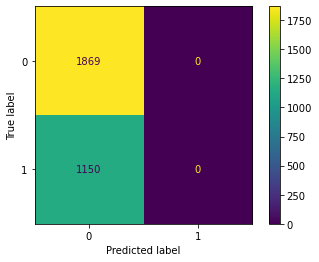

In [85]:
disp = ConfusionMatrixDisplay( confusion_matrix = Cm, display_labels = Rf_Final.classes_)
disp.plot()